In [2]:
import datetime as dt
import time

import numpy as np
import pandas as pd

import pylab as pl
import seaborn as sns

%pylab inline

import sklearn.decomposition as sd
import sklearn.manifold as sm
import sklearn.cluster as sc

import operator

Populating the interactive namespace from numpy and matplotlib


In [3]:
df_activity = pd.read_csv(
    '/Users/anokhin/Desktop/activities.tsv', 
    sep='\t', 
    header=None,
    index_col=0,
    names=[
        "vid",
        "n_sessions",
        "n_hits",
        "n_days",
        "hits_per_session_mean",
        "hits_per_session_std",
        "domains_per_session_mean",
        "domains_per_session_std",
        "interval_between_hits_mean",
        "interval_between_hits_std",
        "len_of_session_mean",
        "len_of_session_std",
        "interval_between_sessions_mean",
        "interval_between_sessions_std",
        "sessions_per_day_mean",
        "sessions_per_day_std"
    ]
)
df_activity.describe()

/usr/local/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,n_sessions,n_hits,n_days,hits_per_session_mean,hits_per_session_std,domains_per_session_mean,domains_per_session_std,interval_between_hits_mean,interval_between_hits_std,len_of_session_mean,len_of_session_std,interval_between_sessions_mean,interval_between_sessions_std,sessions_per_day_mean,sessions_per_day_std
count,694385.000000,694385.000000,694385.000000,694385.000000,694385.000000,694385.000000,694385.000000,567974.000000,567974.000000,694385.000000,694385.000000,373573.000000,373573.000000,694385.000000,694385.000000
mean,2.882934,37.198041,1.106543,11.236653,6.704653,1.923832,0.602679,92.240273,111.993966,583.116027,423.283872,12537.530502,6137.136669,2.562875,0.328762
std,2.799414,157.906590,0.308532,132.368946,24.762351,4.378991,1.746331,120.157437,112.476697,1322.394723,920.672839,12840.707011,8221.147996,2.342734,1.306845
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1201.000000,0.000000,0.500000,0.000000
25%,1.000000,3.000000,1.000000,2.000000,0.000000,1.000000,0.000000,NaN,NaN,18.000000,0.000000,NaN,NaN,1.000000,0.000000
50%,2.000000,9.000000,1.000000,4.250000,0.000000,1.000000,0.000000,NaN,NaN,231.000000,4.509000,NaN,NaN,2.000000,0.000000
75%,4.000000,33.000000,1.000000,11.000000,5.657000,2.000000,0.707000,NaN,NaN,741.500000,553.025000,NaN,NaN,3.000000,0.000000
max,51.000000,90937.000000,2.000000,90937.000000,4474.572000,1192.000000,445.477000,1200.000000,845.700000,86399.000000,58795.929000,86289.000000,58535.006000,48.000000,34.648000


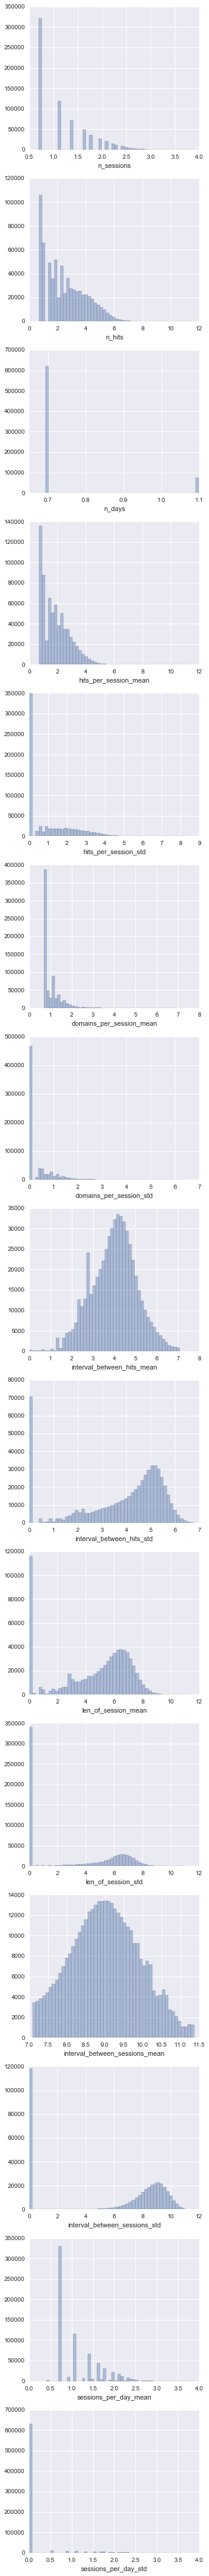

In [3]:
n_columns = len(df_activity.columns)

fig = pl.figure(figsize=(5, 5 * n_columns))

for i, col_i in enumerate(df_activity.columns):   
    ax = pl.subplot(n_columns, 1, i + 1)
    
    c = df_activity[col_i]    
    sns.distplot(np.log1p(c[~np.isnan(c)]), kde=False, bins=50)    

pl.show()

In [4]:
df_activity_sample = df_activity.sample(10000)
df_activity_sample_log = np.log1p(df_activity_sample)
df_activity_sample_log_norm = (df_activity_sample - df_activity_sample.mean()) / df_activity_sample.std()
df_activity_sample_log_norm.fillna(0, inplace=True)
df_activity_sample_log_norm.describe()

,n_sessions,n_hits,n_days,hits_per_session_mean,hits_per_session_std,domains_per_session_mean,domains_per_session_std,interval_between_hits_mean,interval_between_hits_std,len_of_session_mean,len_of_session_std,interval_between_sessions_mean,interval_between_sessions_std,sessions_per_day_mean,sessions_per_day_std
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,6.536993e-17,-9.237056e-18,-2.025047e-16,5.400125e-17,7.116085e-16,-1.136868e-15,-4.352785e-15,1.887202e-15,-3.446132e-15,5.780265e-16,6.952661e-16,-7.448264e-16,-1.322675e-15,1.172396e-17,-5.869083e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.045340e-01,9.045340e-01,1.000000e+00,1.000000e+00,7.310632e-01,7.310632e-01,1.000000e+00,1.000000e+00
min,-6.642696e-01,-2.253573e-01,-3.375596e-01,-7.821625e-02,-2.853894e-01,-2.331431e-01,-3.286117e-01,-7.756321e-01,-9.967397e-01,-4.158273e-01,-4.534395e-01,-8.830994e-01,-7.392460e-01,-8.616379e-01,-2.453942e-01
25%,-6.642696e-01,-2.130749e-01,-3.375596e-01,-7.113554e-02,-2.853894e-01,-2.331431e-01,-3.286117e-01,-5.023086e-01,-7.603243e-01,-4.029358e-01,-4.534395e-01,-3.874350e-01,-4.241246e-01,-6.540594e-01,-2.453942e-01
50%,-3.113289e-01,-1.823688e-01,-3.375596e-01,-5.697412e-02,-2.853894e-01,-2.331431e-01,-3.286117e-01,-1.384315e-01,0.000000e+00,-2.568329e-01,-4.501532e-01,0.000000e+00,0.000000e+00,-2.389022e-01,-2.453942e-01
75%,3.945523e-01,-2.883852e-02,-3.375596e-01,-7.409163e-03,-4.069464e-02,1.616032e-02,5.349550e-02,1.199367e-02,3.577699e-01,1.091854e-01,1.436635e-01,0.000000e+00,0.000000e+00,1.762550e-01,-2.453942e-01
max,1.239453e+01,8.529102e+01,2.962143e+00,9.852065e+01,6.238545e+01,8.103978e+01,5.852455e+01,9.516900e+00,6.159815e+00,6.146235e+01,4.727856e+01,5.623681e+00,6.052278e+00,7.233927e+00,1.979187e+01


In [1]:
pca = sd.PCA(n_components=None)
X = pca.fit_transform(df_activity_sample_log_norm.values)
print "Explained variance: \n " + "\n ".join([str(v * 100) for v in pca.explained_variance_ratio_.cumsum()])
Y = X[:, :9]

NameError: name 'sd' is not defined

In [ ]:
tsne = sm.TSNE(
    n_components=2, 
    n_iter=1000, 
    perplexity=30, 
    early_exaggeration=10.0, 
    min_grad_norm=1e-10, 
    n_iter_without_progress=100, 
    learning_rate=2000, 
    random_state=42, 
    verbose=2,
#     metric='correlation'    
)
Z = tsne.fit_transform(Y)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.000000
[t-SNE] Iteration 25: error = 1.3125318, gradient norm = 0.0072457
[t-SNE] Iteration 50: error = 1.2949510, gradient norm = 0.0043992
[t-SNE] Iteration 75: error = 1.2097178, gradient norm = 0.0025035

In [ ]:
dbscan = sc.DBSCAN(eps=0.5, min_samples=5)
cls = dbscan.fit_predict(Z)

In [ ]:
kmeans = sc.KMeans(n_clusters=30, n_init=100, max_iter=1000, verbose=0)
cls = kmeans.fit_predict(X)

In [ ]:
n_clusters = len(np.unique(cls))
print "%d clusters found" % n_clusters
cluster_sizes = sorted([(c, (cls == c).sum()) for c in xrange(n_clusters)], key=operator.itemgetter(1), reverse=True)

In [ ]:
pl.plot(range(n_clusters), np.cumsum(map(lambda cs: cs[1], cluster_sizes)), "o-")
pl.show()

In [ ]:
N_TOP_CLUSTERS = 12
top_clusters = map(lambda cs: cs[0], cluster_sizes)[:N_TOP_CLUSTERS]

cm = pl.cm.Paired

pl.figure(figsize=(15, 15))
for c in xrange(n_clusters):    
    pl.scatter(Z[cls == c, 0], Z[cls == c, 1], color=cm(int(1.0 * c / n_clusters * 256)) if c in top_clusters else 'gray', label="%d" % c)
    
pl.legend()
pl.show()

In [ ]:
df_activity_sample_cls = df_activity_sample.copy()
df_activity_sample_cls["cls"] = cls
df_activity_sample_cls.head()

In [ ]:
print top_clusters
df_stats = pd.concat([df_activity_sample_cls[df_activity_sample_cls.cls == c].describe().loc[["50%"]] for c in top_clusters])
df_stats

In [ ]:
features = [
        "n_sessions", 
        "n_hits", 
        "n_days", 
        "hits_per_session_mean", 
        "hits_per_session_std", 
        "domains_per_session_mean", 
        "domains_per_session_std", 
        "interval_between_hits_mean", 
        "interval_between_hits_std", 
        "len_of_session_mean", 
        "len_of_session_std", 
        "interval_between_sessions_mean", 
        "interval_between_sessions_std", 
        "sessions_per_day_mean", 
        "sessions_per_day_std"
    ]

df_stats_norm = df_stats[features].copy()
df_stats_norm = df_stats_norm / df_stats_norm.max()
df_stats_norm

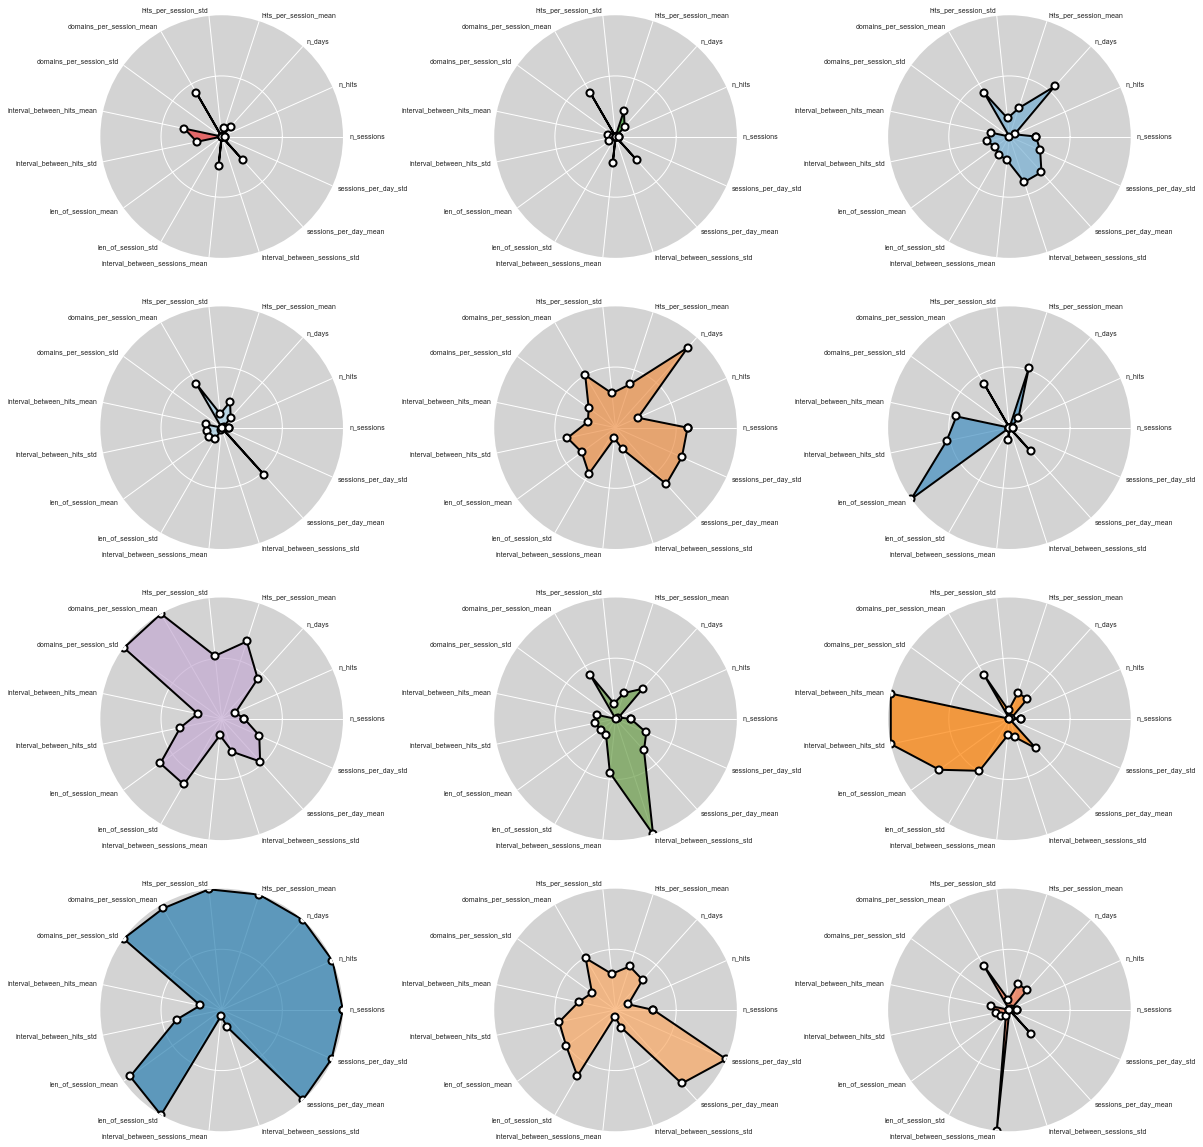

In [20]:
def radar(centroid, features, axes, color, ymax=1):
    # Set ticks to the number of features (in radians)
    t = np.arange(0, 2*np.pi, 2*np.pi/len(features))
    plt.xticks(t, [])

    # Set yticks from 0 to 1
    plt.yticks([0.5], [])

    # Draw polygon representing centroid
    points = [(x, y) for x, y in zip(t, centroid)]
    points.append(points[0])
    points = np.array(points)
    codes = [path.Path.MOVETO,] + [path.Path.LINETO,] * (len(centroid) - 1) + [ path.Path.CLOSEPOLY ]
    _path = path.Path(points, codes)
    _patch = patches.PathPatch(_path, fill=True, color=color, linewidth=0, alpha=.7)
    axes.add_patch(_patch)
    _patch = patches.PathPatch(_path, fill=False, linewidth = 2)
    axes.add_patch(_patch)

    # Draw circles at value points
    plt.scatter(points[:,0], points[:,1], linewidth=2, s=50, color='white', edgecolor='black', zorder=10)

    # Set axes limits
    plt.ylim(0, ymax)

    # Draw ytick labels to make sure they fit properly
    for i in range(len(features)):
        angle_rad = i/float(len(features))*2*np.pi
        angle_deg = i/float(len(features))*360
        ha = "right"
        if angle_rad < np.pi/2 or angle_rad > 3*np.pi/2: ha = "left"
        plt.text(angle_rad, ymax * 1.05, features[i], size=7, horizontalalignment=ha, verticalalignment="center")

# Some additiola imports
import matplotlib
import matplotlib.path as path
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Choose some nice colors
matplotlib.rc('axes', facecolor = 'lightgray')
# Make figure background the same colors as axes 
fig = plt.figure(figsize=(20, 20), facecolor='white')

cm = pl.cm.Paired

for j, c in enumerate(top_clusters):        
    centroid = df_stats_norm[df_stats.cls == c].values.mean(axis=0)
    # Use a polar axes
    axes = plt.subplot(4, 3, j + 1, polar=True)
    radar(centroid, features, axes, cm(int(1.0 * c / n_clusters * 256)))

plt.show()

In [21]:
with open("/Users/anokhin/Desktop/vids.txt", "w") as vf:
    for vid in df_activity_sample_cls.index.values:
        print >> vf, vid    

# INDIVIDUAL USERS

In [22]:
vid_data = {}
with open("/Users/anokhin/Desktop/users.txt", "r") as vf:
    for line in vf:
        vid, data = line.strip().split("\t")
        vid_data[vid] = {}
        
        for d in data.split(","):
            if not d:
                continue
                
            ts = int(d.split(":")[0])
            domain = d.split(":")[1]
            
            if domain not in vid_data[vid]:
                vid_data[vid][domain] = [ts]
            else:
                vid_data[vid][domain].append(ts)       
        
print vid_data.items()[2]

('1929ef4ae', {'ok.ru': [1466589796, 1466589843, 1466589942, 1466589956, 1466589959, 1466589963, 1466589965, 1466589985, 1466590044, 1466590055, 1466592114, 1466592152, 1466592179, 1466592200, 1466592200, 1466592211, 1466592216, 1466756124, 1466756127, 1466756267, 1466756270, 1466756274, 1466756275, 1466756312, 1466756323, 1466756355, 1466756359, 1466756375, 1466756380, 1466756391, 1466756414, 1466756422, 1466756441, 1466756474, 1466756477, 1466756508, 1466756540, 1466756544, 1466756547, 1466756559, 1466756565, 1466756778, 1466756797, 1466758167, 1466759598, 1466846971, 1466849716, 1466849722, 1466849837, 1466849843, 1466849851, 1466851331, 1466852837, 1466852841, 1466852844, 1466853216, 1466853223, 1466853225, 1466853290, 1466853353, 1466853359, 1466854494, 1466854539, 1466854547, 1466854550, 1466855874, 1466855879, 1466855885, 1466857312, 1466858107, 1466858125, 1466858770, 1466859128, 1466859132, 1466859136, 1466859198, 1466859466, 1466859471, 1466947499, 1466947550, 1466947595, 146

[13, 8, 1, 0, 20, 2, 22, 9, 19, 3, 16, 15]


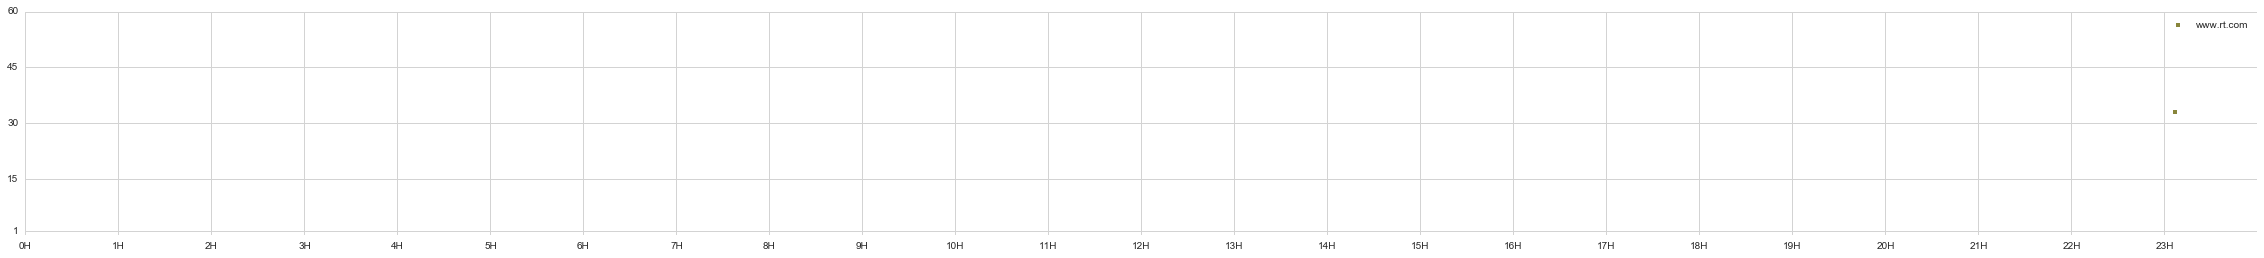

{'www.rt.com': [1467144453]}


In [89]:
print top_clusters
vid = df_activity_sample_cls[df_activity_sample_cls.cls == 13].sample(1).index[0]

tss = [ts for ts in flatten([ts_list for d, ts_list in vid_data[vid].iteritems()])]
min_date = dt.datetime.fromtimestamp(min(tss)).date() 
max_date = dt.datetime.fromtimestamp(max(tss)).date()

n_days = (max_date - min_date).days + 1

pl.figure(figsize=(40, 4 * n_days))

cm=pl.cm.Dark2

for day in xrange(n_days):
    pl.subplot(n_days, 1, day + 1, axisbg='white')
    
    start_ts = int(time.mktime((min_date + dt.timedelta(days=day)).timetuple()))
    end_ts = int(time.mktime((min_date + dt.timedelta(days=day+1)).timetuple()))
    
    for d, ts_list in vid_data[vid].iteritems():
        ts_list_day = filter(lambda ts: start_ts < ts <= end_ts, ts_list)
        if ts_list_day:
            pl.scatter([ts / 60 for ts in ts_list_day], [ts % 60 for ts in ts_list_day], c=cm(hash(d) % 256), label=d, marker='s', s=12, lw=0)
        
    pl.legend()
    pl.grid(color='lightgray')
    pl.xlim(start_ts / 60, end_ts / 60)    
    pl.xticks(range(start_ts / 60, end_ts / 60, 60), ["%dH" % h for h in xrange(24)])
    pl.ylim(0,59)
    pl.yticks([1, 15, 30, 45, 60])
    
pl.show()

import pprint
pprint.pprint(vid_data[vid])